# Основы машинного обучения. Минимизация функции ошибки. Градиентный спуск

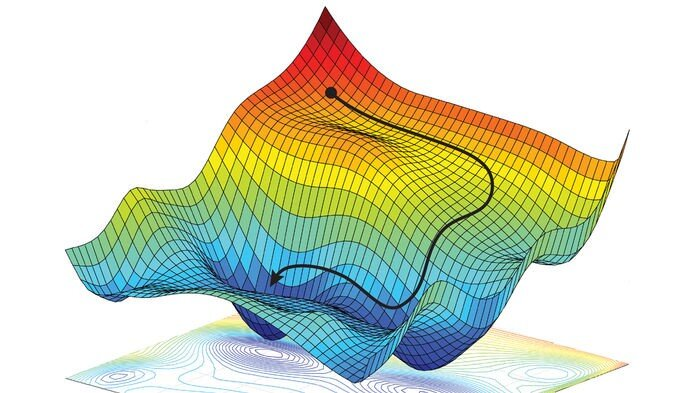

## Что мы изучим на этом занятии

* Основы машинного обучения
    * Что такое машинное обучение?
    * Где используется машинное обучение?
    * Датасет
    * Примеры признаков и целевых переменных
    * Обучение
    * Поиск функциональной зависимости
    * Как оценивается качество обучения?
    * Тестирование модели
    * Общая картина
* Градиентный спуск
    * Минимизация функции потерь
    * Итеративное уменьшение функции потерь
    * Алгоритм градиентного спуска
    * Более формальнрое объяснение алгоритма

## Основы машинного обучения

### Что такое машинное обучение?

Что означает, что "машина обучается"? Если мы скачали все данные из Википедии, то мы не сделали компьютер умнее. Машинное обучение относится к программам, которые выполняет компьютер. Оно позволяет **компьютерным программам улучшать качество выполнения задач исходя из полученного опыта**. Этот опыт представлен в виде данных.

### Где используется машинное обучение?

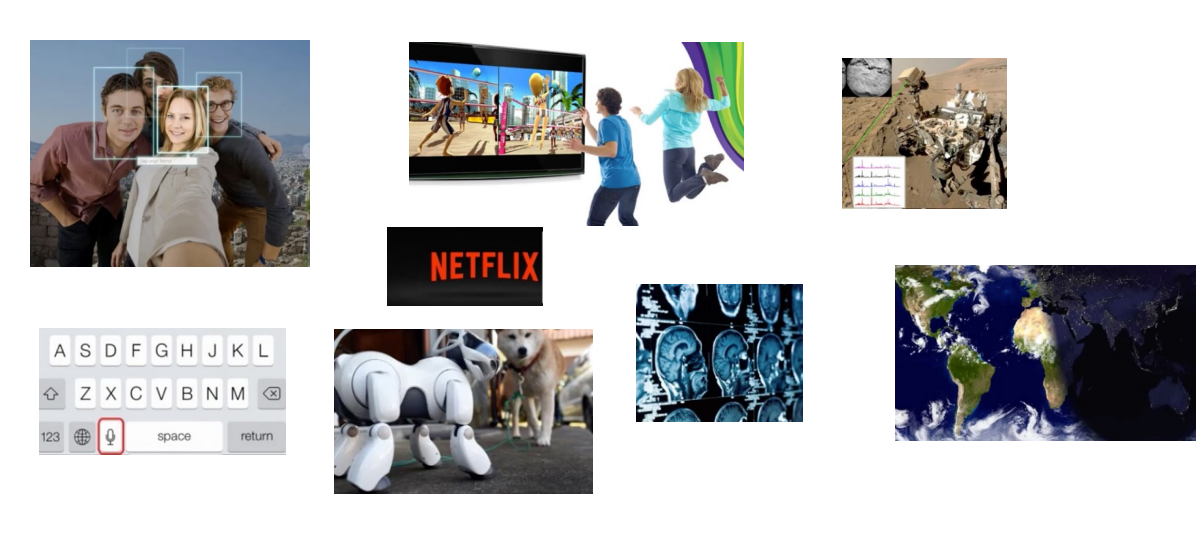

Источник: A. Khan. "Introduction to Machine Learning" Course.

### Датасет

Набор данных (или датасет) - это именно тот **опыт**, который компьютер использует, чтобы хорошо выполнять свои задачи. Это очень важная часть машинного обучения. Без данных мы не сможем научить компьютер выполнять нужные нам задачи.

Но прежде чем мы перейдем к тому как научить компьютер что-то делать, нам нужно определить что такое данные с точки зрения математики:

$$ D = \{ (x_1, y_2), (x_2, y_2) \dots  (x_N, y_N) \} $$

* $x_1, x_2 ... x_N \in R^{d}$ - *признаки* (или предикторы, или фичи (англ. features)). Например, это могут быть данные о процессе работы программы.
* $y_1, y_2 ... y_N$ - *целевая переменная* (или цель (англ. target), или ответ (англ. response), или метка, или результат). Например, это может быть информация о том, является ли программа вредоносной.


Датасет - это набор (или множество) пар. Каждая пара содержит *признаки* и *целевую переменную* и представляет собой один конкретный пример. Множество таких примеров и формируют датасет.

### Примеры признаков и целевых переменных

| Признаки $X$ | Цель $Y$ | Задача |
| --- | --- | --- |
| Характеристики дома | Цена на дом | Недвижимость |
| Информация о пользователе и рекламе | Переход на сайт | Реклама |
| Изображение | Название объекта | Тэггинг изображений |
| Аудио | Транскрипт | Распознавание речи |
| Русский | Китайский | Машинный перевод |
| Изображение и данные с радаров | Расположение других машин | Автономные автомобили |

### Обучение

Машинное обучение позволяет "предсказывать" значения целевой переменной, основываясь на признаках. Если мы хотим научить компьютер предсказывать цель, то с математической точки зрения мы предполагаем, что существует **(функциональная) зависимость $f$ между значениями признаков и целевыми значениями**:

$$y = f(x)$$

То есть, передав числа из признаков ($x$), мы можем вычислить целевые значения ($y$) с помощью функции $f$. Поэтому, задача машинного обучения: **найти эту функцию $\hat{f}$, которая будет максимально приближена к $f$**:

$$\hat{f} \approx f$$

Функцию $\hat{f}$ ещё называют *моделью*. Если мы находим эту модель с помощью методов машинного обучения, то эту модель называют *моделью машинного обучения*.

### Поиск зависимости $\hat{f}$



Чтобы лучше понять как происходит поиск зависимости между предикторами и целью, рассмотрим такой пример. У нас есть датасет $D = \{ (x_1, y_1), (x_2, y_2) ... \}$, где $x_i$ - это значения по оси $x$, а $y_i$ - это значения по оси $y$. Нашей задачей будет **предсказать значения $y$, используя значения $x$**. Мы можем представить датасет как набор точек на плоскости. Давате изобразим их на плоскости:

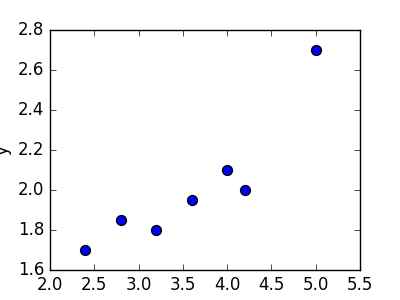

Источник: https://neurohive.io/ru/osnovy-data-science/linejnaja-regressija/

Когда мы говорили о функции $y = f(x)$, мы не указали ещё один важный аргумент функции $f$. **Помимо аргумента $x$, мы также ещё передаем значения аргумента $w$**:

$$ y = f(x, w) $$

Аргумент $w$ также ещё называется *весами модели*.

Теперь нам нужно подумать о том, какой может быть функция $y = \hat{f}(x)$. На самом деле, она может быть какой угодно. Например, она может быть такой:

$$ y = w_1 x + w_0 $$

Если мы вспомним школьную математику, то мы поймем, что такая функция представляет собой прямую на плоскости. Но где нам нужно провести эту плоскость? Мы же ведь можем изобразить её множеством способов...

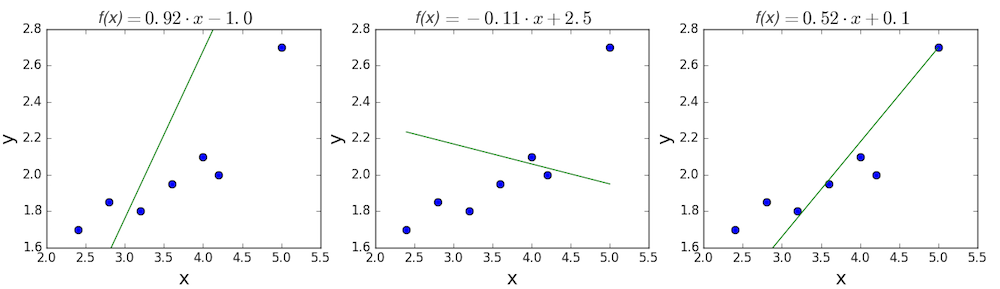

Источник: https://neurohive.io/ru/osnovy-data-science/linejnaja-regressija/

То, как мы изобразим эту прямую на плоскости, зависит от значений весов модели $w_0$ и $w_1$. **В этом из заключается задача машинного обучения: найти подходящие веса модели**.

### Как оценивается качество обучения?  

Теперь, так как нам нужно найти подходящие веса модели, нам нужно различать какие веса подходят нам меньше, а какие веса подходят нам больше. Для этого мы используем *функцию ошибки* (или *функцию потерь* (англ. loss function)).

Так как нам нужно предсказать значения $y$, используя $x$, нам нужно сделать так, чтобы значения нашей функции (или модели) были максимально близки к истинным значениям $y$

$$ y \approx \hat{f}(x) $$

Чтобы достичь этого, нужно сделать так, чтобы разница между значениями $y$ и $\hat{f}$ была как можно меньше.

Функция ошибки, которая измеряет разницу между значениями $y$ и $\hat{f}$, называется *средне-квадратичной ошибкой* (англ. Mean Squared Error, MSE)

$$\text{MSE} = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{f}(x_i, w))^2$$

Это не единственная функция ошибки, существуют и другие подобные функции, но эта функция - одна из часто используемых.

В эту функцию мы можем передавать различные значения весов $w$ и получать различные значения функции потерь. **Минимизируя эту функцию, мы получим самые подходящие значения весов**.

### Тестирование модели

**Обучением модели машинного обучения и является минимизация функции потерь**. Представим, что мы обучили нашу модель. Обучив модель, мы заставили её предсказывать $y$ с минимальной ошибкой. Теперь мы можем попытаться использовать эту модель в реальных условиях, чтобы предсказывать $y$. И здесь важно отметить, что **в реальных условиях, на которых модель не обучалась, может ошибаться больше**.

Но насколько больше модель будет ошибаться? Для этого нам нужно провести *тестирование* модели на тех данных, на которых она не обучалась. Поэтому, перед обучением датасет должен быть разделен на два датасета:

1. Тренировочный датасет
2. Тестовый датасет

Результатам теста являются *метрики*, которые вычисляются с помощью тестового датасета и весов обученной модели. Таких метрик может быть много. Одно из таких метрик может быть MSE.

### Общая картина

Теперь, все этапы создания модели мы можем собрать воедино и показать на одной схеме:



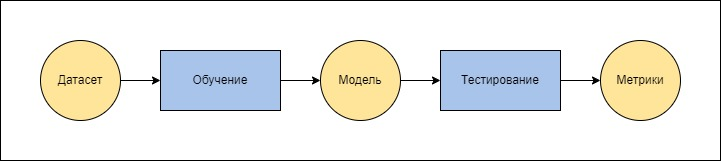

## Упраженение 1

*Напишите ответ на месте троиточий (...)*

Ответьте на следующие вопросы:

1. Что такое машинное обучение?

    Ответ: ...

2. Приведите примеры того, где используется машинное обучение.

    Ответ: ...

3. Что такое датасет? Из чего он состоит?

    Ответ: ...

4. Что такое признаки и для чего они нужны?

    Ответ: ...

5. Что такое целевая переменная и для чего она нужна?

    Ответ: ...

6. Что такое модель машинного обучения и из чего она состоит?

    Ответ: ...

7. Что такое веса модели?

    Ответ: ...

8. Что означает обучить модель?

    Ответ: ...

9. Что такое функция потерь?

    Ответ: ...

10. Для чего нужно тестировать модель?

    Ответ: ...

## Градиентный спуск

### Минимизация функции потерь

На занятии по математическому анализу мы выяснили, что для нахождения минимума функции необходимо найти производную функции и найти в каких точках эта производная равняется нулю.

Но на практике это не всегда возможно по тем или иным причинам. Поэтому для нахождения минимумов функции потерь принято использовать специальные *итеративные подходы*.

### Итеративное уменьшение функции потерь

Градиентный спуск является таким подходом, который позволяет итеративно, шаг за шагом, искать минимум функции потерь. С помощью него мы можем обучать модель машинного обучения, итеративно уменьшая потери. Такой подход напоминает то, как учимся мы: учимся на ошибках.

Процесс итеративного уменьшения показан на диаграмме

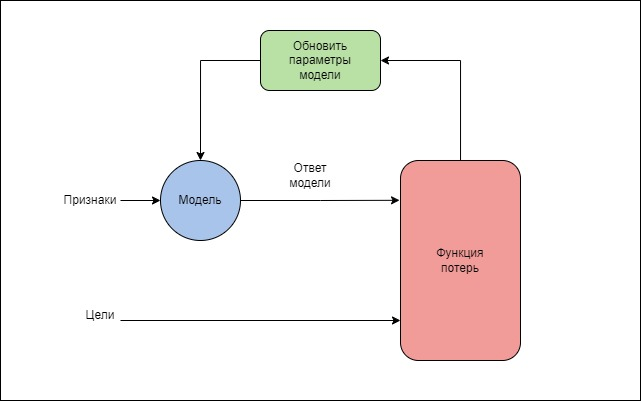

Источник: https://developers.google.com/machine-learning/crash-course/reducing-loss/an-iterative-approach

### Алгоритм градиентного спуска

Теперь, давайте посмотрим как обучает модель шаг за шагом. Для этого давайте схематично изобразим на графике зависимость функции потерь от одного из параметров (на оси абсцисс находятся значение одного из весов модели, на оси ординат находятся значения функции потерь):

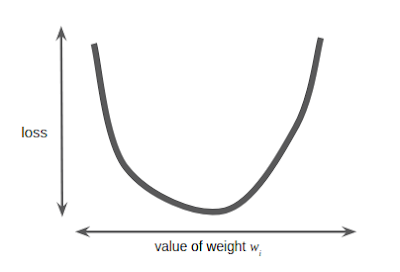

#### Шаг 0: выбираем начальные значения весов

На этом шаге мы случайным образом выбираем значения всех весов модели. Они могут быть какими угодно. От этих значений (или точек) мы и будем отталкиваться.

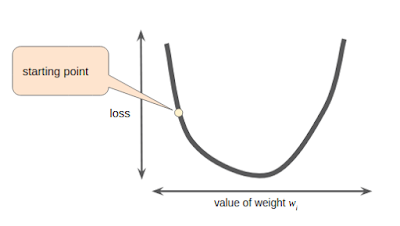

#### Шаг 1: Вычисляем значения градиента в выбранной точке

Градиент, или значение производной, - это вектор, состоящий из чисел. Количество этих чисел равно количеству весов модели.

Так как градиент - это вектор, то он имеет длину и направление. Направление градиента всегда показывает в сторону наибольшего прироста функции. Но так как нам нужно не увеличивать, а уменьшать функцию потерь, то нам необходимо идти в направлении, противоположном градиенту: нужно идти в направлении *антиградиента*.

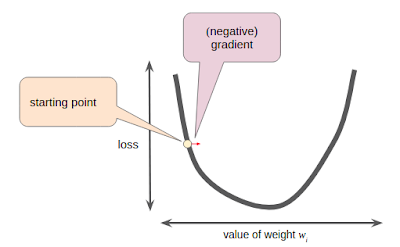

#### Шаг 2: Сделать шаг в направлении антиградиента

На этом шаге мы сокращаем значение функции потерь, прибавляя значения антиградиента к весам модели, умноженные на число от 0 до 1. Это число называется *темпом обучения* (англ. learning rate).

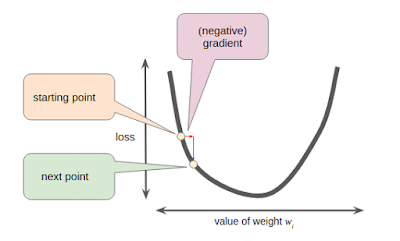

#### Повторяем шаги 1 и 2 пока не достигнем минимума

Градиентный спуск повторяет процесс пока не сойдется к минимуму. То, что мы сошлись к минимуму может означать то, что значения функции потерь перестали изменяться значительным образом.

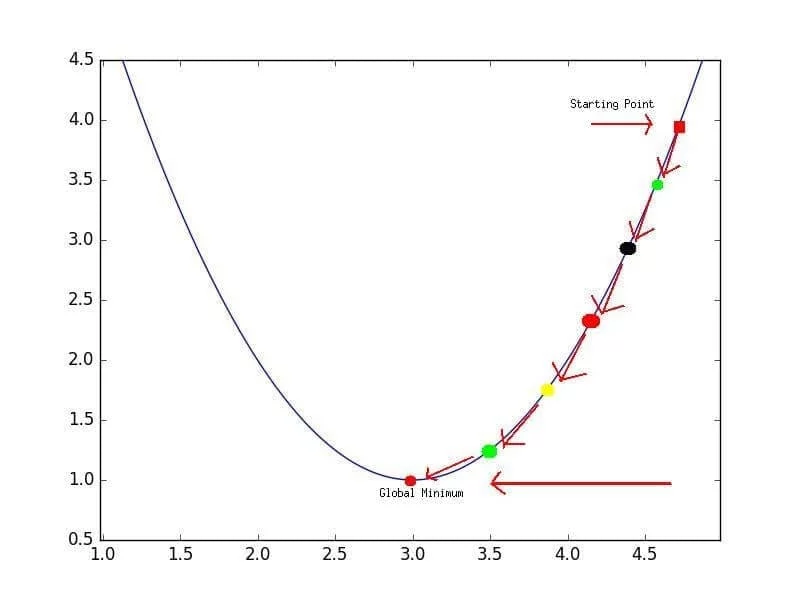

### Более формальное объяснение алгоритма

Пусть функция потерь задается таким образом:

$$ L(w_0, w_1) = \frac{1}{N} \sum_{i=1}^{N} (y_i - (w_1 x_i + w_0)) $$

Градиентный спуск сокращает значения фукнции потерь итеративно. Он делает это путем обновляения значения параметров модели согласно формулам:

$$ w_0 = w_0 - \alpha \frac{\partial L}{\partial w_0} $$

$$ w_1 = w_1 - \alpha \frac{\partial L}{\partial w_1} $$

где
* $w_0, w_1$ - веса модели
* $\alpha$ - темп обучения
* $\frac{\partial L}{\partial w_0}, \frac{\partial L}{\partial w_1}$ - значения градиента

## Упражнение 1

*Решите задание и напишите ответ на месте троиточия (...). Подсказка: воспользуйтесь алгоритмом и формулами, представленными выше, чтобы решить задание*

Вы получили вот такую функцию потерь

$$ L(w_0, w_1) = \frac{(1 - (w_1 + w_0))^2}{2} + \frac{(2 - (2w_1 + w_0))^2}{2} $$

Найдите веса модели $w_0$ и $w_1$ методом градиентного спуска.

Ответ:

$$w_0 = ...$$

$$w_1 = ...$$

## Заключение

На этом занятии мы познакомились с основными понятиями машинного обучения и принципами работы алгоритмов. Мы изучили, как формируется датасет, что такое признаки и целевые переменные, и как происходит поиск функциональной зависимости между ними. Мы узнали, что модель машинного обучения — это приближение функции, которая описывает зависимости в данных, а процесс обучения — это подбор наилучших весов для этой модели, чтобы минимизировать ошибку.

Одним из важных методов обучения моделей является градиентный спуск. Мы рассмотрели, как этот алгоритм позволяет итеративно уменьшать функцию потерь, что помогает модели точнее предсказывать целевые значения. Мы также узнали о роли таких параметров, как темп обучения и градиенты, которые определяют направление и величину изменения весов.

Тестирование модели на новых данных помогает оценить её качество и готовность к работе в реальных условиях. Мы также научились определять, когда модель необходимо тестировать, и какие метрики, такие как MSE, можно использовать для оценки её точности.

На следующих занятиях мы продолжим исследовать алгоритмы машинного обучения и углубимся в другие методы оптимизации, которые позволяют создавать более точные и эффективные модели для решения различных задач.